data/0.0189290_200k
Angle in radians:  0.01892895180717471
Angle in degrees:  1.0845490491576433
D =  129.9615927880418


RFBOutputContext()

JupyterRenderCanvas(css_height='800.0px', css_width='800.0px')
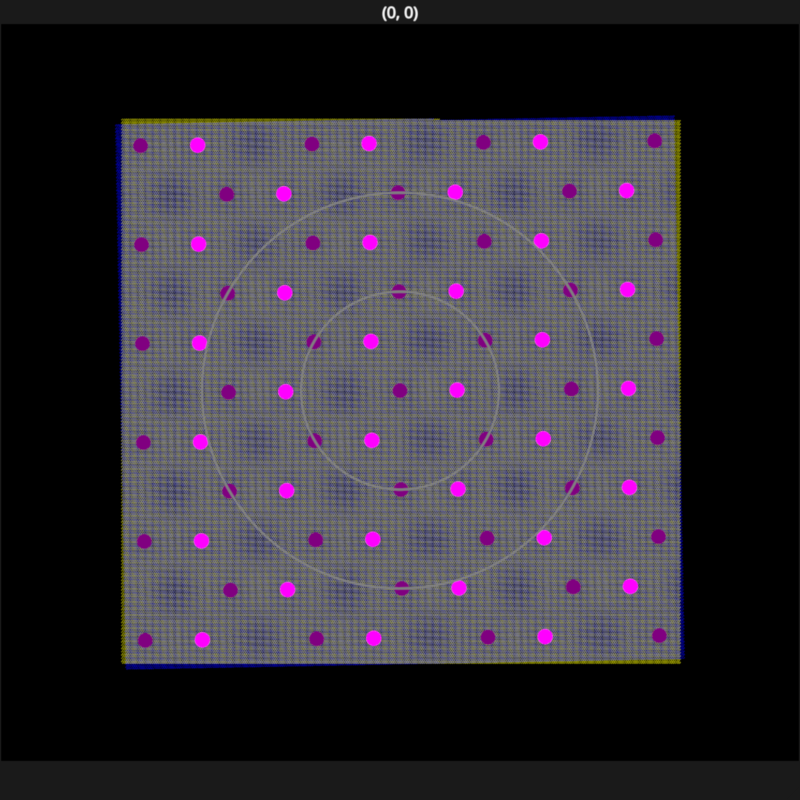

In [11]:
import os
os.environ["FASTPLOTLIB_RENDERER"] = "vispy-offscreen"

import fastplotlib as fpl
import numpy as np
from pathlib import Path

# -- Load data
def load_lattice(path):
    with open(path) as f:
        return np.array([
            [np.float64(x) for x in line.split(";")]
            for line in f if line.strip()  # skip empty lines
        ])

# -- Load properties
def load_properties(path):
    p = 0
    q = 0
    i = 0
    steps = 0
    with open(path / "properties.dat") as f:
        data = f.readlines()
        for line in data:
            if line != "\n":
                aux = line.split("=")
                if aux[0] == "p":
                    p = int(float(aux[1]))
                elif aux[0] == "q":
                    q = int(float(aux[1]))
                elif aux[0] == "i":
                    i = int(float(aux[1]))
                elif aux[0] == "steps":
                    steps = int(float(aux[1]))
    return p, q, i, steps
                


base_data_path = Path("data")
dataset_dirs = sorted([d for d in base_data_path.iterdir() if d.is_dir()])
n_datasets = len(dataset_dirs)
k = n_datasets-1
print(dataset_dirs[k])

a = 2.46
p, q, j, steps = load_properties(dataset_dirs[k])
angle_i = np.acos((3.0*(q**2) - (p**2))/(3.0*(q**2) + (p**2)))
angle_f = np.acos((3.0*((q-1)**2) - (p**2))/(3.0*((q-1)**2) + (p**2)))
angle = angle_i + (j/steps)*(angle_f  - angle_i)
print("Angle in radians: ", angle)
print("Angle in degrees: ", (angle * 180) / np.pi)
moire_period = a/(2*np.sin(angle/2))
print("D = ", moire_period)

latA1 = load_lattice(dataset_dirs[k] / "latticeA1.dat")
latB1 = load_lattice(dataset_dirs[k] / "latticeB1.dat")
latA2 = load_lattice(dataset_dirs[k] / "latticeA2.dat")
latB2 = load_lattice(dataset_dirs[k] / "latticeB2.dat")

latAA = load_lattice(dataset_dirs[k] / "latticeAA.dat")
latBA = load_lattice(dataset_dirs[k] / "latticeBA.dat")
latAB = load_lattice(dataset_dirs[k] / "latticeAB.dat")
latBB = load_lattice(dataset_dirs[k] / "latticeBB.dat")

# -- Combine data
cloud = np.vstack([latA1,
                   latB1,
                   latA2,
                   latB2])
n_A1, n_B1, n_A2, n_B2 = map(len, (latA1, latB1, latA2, latB2))
colors = ["yellow"] * n_A1 + ["yellow"] * n_B1 + ["blue"] * n_A2 + ["blue"] * n_B2


n_AA, n_BA, n_AB, n_BB = map(len, (latAA, latBA, latAB, latBB))
stack_sup = []
if n_AA != 0:
    stack_sup.append(latAA)
if n_BA != 0:
    stack_sup.append(latBA)
if n_AB != 0:
    stack_sup.append(latAB)
if n_BB != 0:
    stack_sup.append(latBB)
    
cloud_superposition = np.vstack(stack_sup)
colors_superposition = ["cyan"] * n_AA + ["magenta"] * n_BA + ["purple"] * n_AB + ["red"] * n_BB

# -- Plot
figure = fpl.Figure(size=(800, 800))

figure[0, 0].add_scatter(data=cloud, sizes=0.3, colors=colors, alpha=0.8)
figure[0, 0].add_scatter(data=cloud_superposition, sizes=15, colors=colors_superposition, alpha=1.0)

r = moire_period
theta = np.linspace(0, 2 * np.pi, 200)
x = r * np.cos(theta)
y = r * np.sin(theta)
circle_data = np.stack([x, y], axis=1)
figure[0, 0].add_line(data=circle_data, thickness=2, colors="gray")

r = moire_period*2.0
theta = np.linspace(0, 2 * np.pi, 200)
x = r * np.cos(theta)
y = r * np.sin(theta)
circle_data = np.stack([x, y], axis=1)
figure[0, 0].add_line(data=circle_data, thickness=2, colors="gray")

figure[0, 0].axes.visible = False
# figure[0, 0].axes.set_xlabel("X Axis Label")
# figure[0, 0].axes.set_ylabel("Y Axis Label")


figure.show()

In [12]:
figure.export("test.png")